# Modelling practice in Python

Hi, I've done this problem before in R. I'm redoing it in Python for practice. So lets begin by importing the required libraries. 


In [284]:
# importing libraries

# data analysis 
import pandas as pd

# visualization
# import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# encoding
from sklearn.preprocessing import LabelEncoder

# modelling
from sklearn.ensemble import RandomForestClassifier


In [285]:
# importing datasets
train = pd.read_csv('train.csv')
# train.info()
test = pd.read_csv('test.csv')
# test.info()

# merging data for feature engineering and pre processing 

full = [train, test]
full = pd.concat(full)

In [286]:
# full.shape
# inspecting te dataset 

full.astype('object').describe()


,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
count,1046.0,295,1307,1308.00,1309,1309,1309,1309,1309,1309,891.0,1309
unique,98.0,186,3,281.00,1307,8,1309,3,2,7,2.0,929
top,24.0,C23 C25 C27,S,8.05,"Connolly, Miss. Kate",0,1309,3,male,0,0.0,CA. 2343
freq,47.0,6,914,60.00,2,1002,1,709,843,891,549.0,11


In [287]:
full.describe()

C:\Users\Audhoot\Anaconda3\lib\site-packages\numpy\lib\function_base.py:4274: RuntimeWarning: Invalid value encountered in percentile
  interpolation=interpolation)


,Age,Fare,Parch,PassengerId,Pclass,SibSp,Survived
count,1046.000000,1308.000000,1309.000000,1309.000000,1309.000000,1309.000000,891.000000
mean,29.881138,33.295479,0.385027,655.000000,2.294882,0.498854,0.383838
std,14.413493,51.758668,0.865560,378.020061,0.837836,1.041658,0.486592
min,0.170000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
25%,NaN,NaN,0.000000,328.000000,2.000000,0.000000,NaN
50%,NaN,NaN,0.000000,655.000000,3.000000,0.000000,NaN
75%,NaN,NaN,0.000000,982.000000,3.000000,1.000000,NaN
max,80.000000,512.329200,9.000000,1309.000000,3.000000,8.000000,1.000000


# Dealing with missing values. 

There are missing values in Age, Fare and Embarked. 

### 1. Age

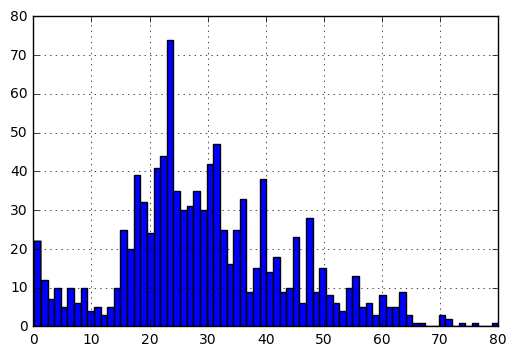

In [288]:
# Dealing with Age

# visualizing age with respect to passengers survived


full['Age'].hist(bins=70)

# Looks like most of the passengers are between the ages 18 and 40


In [289]:
# Checking mean age for values between 18 and 40
full.Age[(full['Age'] > 18) & (full['Age'] < 40)].mean()

27.736842105263158

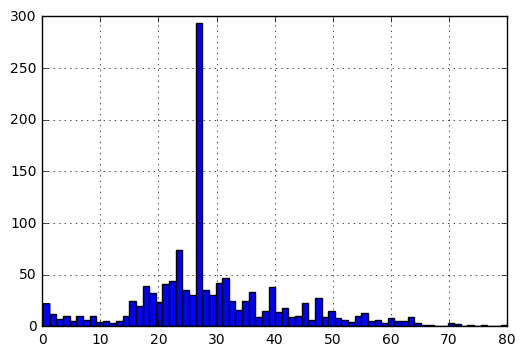

In [290]:
# Filling Nan Age values with 27

full['Age'] = full['Age'].fillna(27)

# full['Age'].describe()

#Visualizing new age values
full['Age'].hist(bins=70)







### 2. Fare

In [291]:
# Find which values are null
full.PassengerId[full['Fare'].isnull()]

# check ther attributes of that person
full.iloc[1043]

Age                          60.5
Cabin                         NaN
Embarked                        S
Fare                          NaN
Name           Storey, Mr. Thomas
Parch                           0
PassengerId                  1044
Pclass                          3
Sex                          male
SibSp                           0
Survived                      NaN
Ticket                       3701
Name: 152, dtype: object

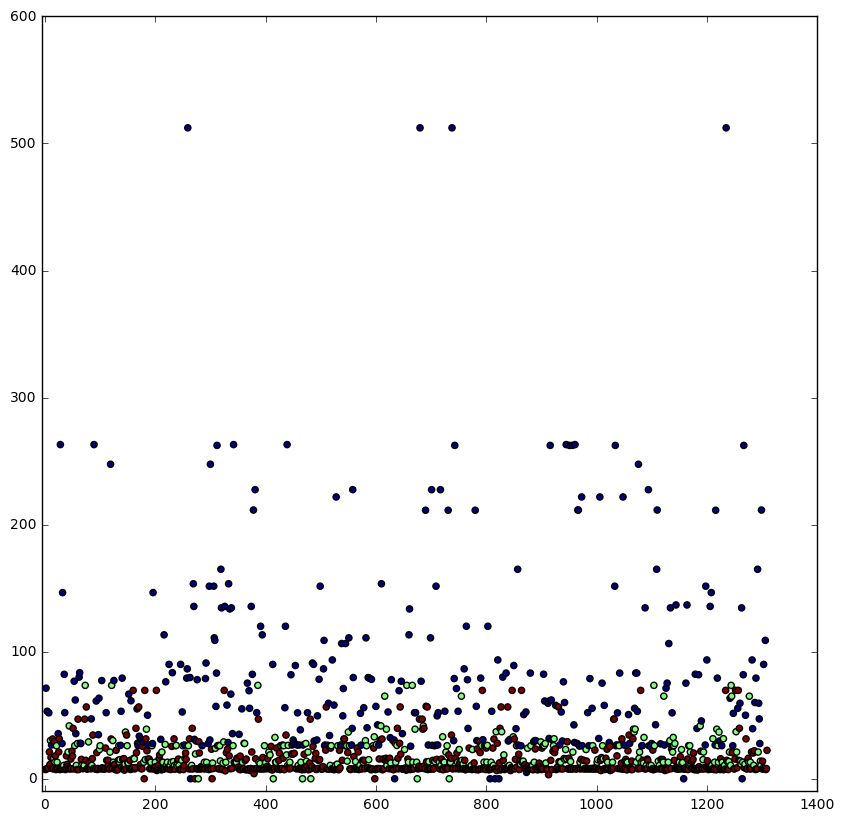

In [292]:
# Lets visualize how much pclass == 3 are 

plt.figure(figsize=(10,10)) 
axes = plt.gca()
axes.set_xlim([-5,1400])
axes.set_ylim([-10, 600])
plt.scatter(full['PassengerId'], full['Fare'], c = full['Pclass'])


In [293]:
full.Fare[full['Pclass'] == 3].median()

8.05

In [294]:
# Fill missing fare value by median

full['Fare'] = full['Fare'].fillna(8.05)

### 3. Embarked 


In [295]:
full['Embarked'].describe()

count     1307
unique       3
top          S
freq       914
Name: Embarked, dtype: object

In [296]:
# We fill missing values by most embarked 

full['Embarked'] = full['Embarked'].fillna('S')

# Feature Engineering 

Adding a few more features like Family Size and Title 

## Family Size 

In [297]:
full['FamilySize'] =  full["Parch"] + full["SibSp"] + 1


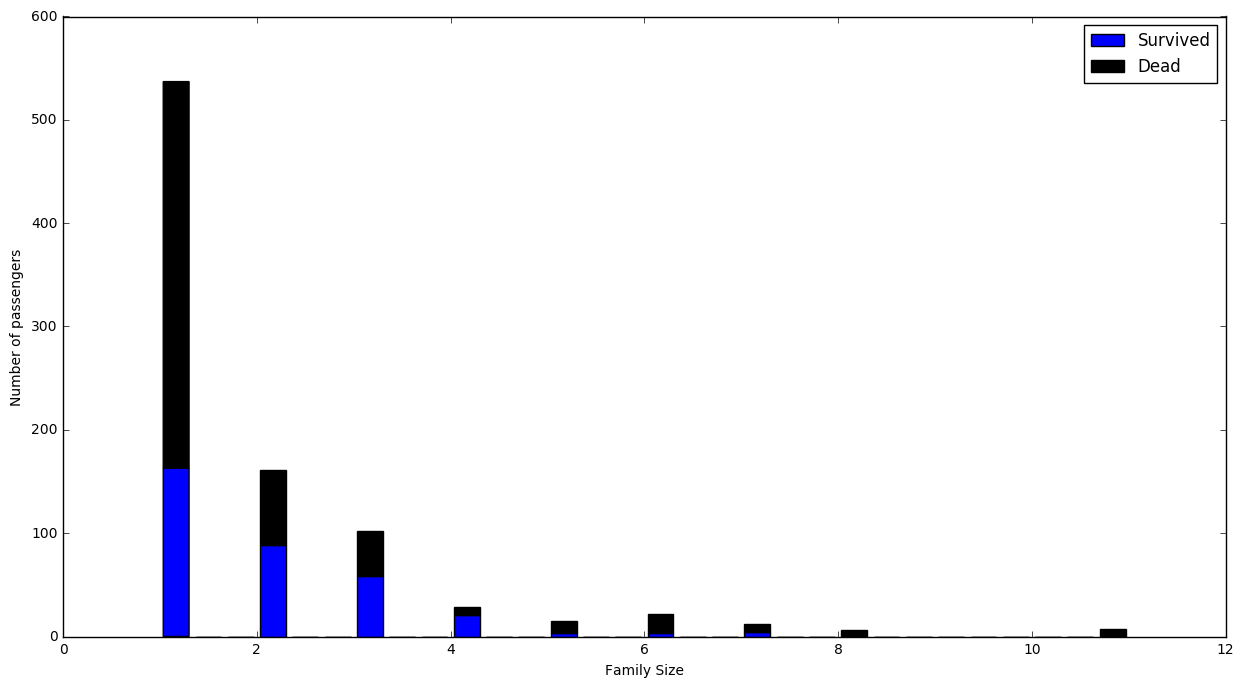

In [298]:
# Visualizing family size and survival rate
figure = plt.figure(figsize=(15,8))
plt.hist([full[full['Survived']==1]['FamilySize'], full[full['Survived']==0]['FamilySize']], stacked=True, color = ['blue','black'],
         bins = 30,label = ['Survived','Dead'])
plt.xlabel('Family Size')
plt.ylabel('Number of passengers')
plt.legend()

In [299]:
# Looks like people with no families have higher chances of survival 

## Title 

In [300]:
full['Title'] = full.Name.str.extract(' ([A-Za-z]+)\.', expand=False)

In [301]:
pd.crosstab(full['Title'], full['Survived'])

Survived,0.0,1.0
Title,,
Capt,1,0
Col,1,1
Countess,0,1
Don,1,0
Dr,4,3
Jonkheer,1,0
Lady,0,1
Major,1,1
Master,17,23


In [302]:
# Replace rare titles by 'Rare'

full['Title'] = full['Title'].replace(['Lady', 'Countess','Capt', 'Col', 'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')

pd.crosstab(full['Title'], full['Survived'])

Survived,0.0,1.0
Title,,
Master,17,23
Miss,55,127
Mlle,0,2
Mme,0,1
Mr,436,81
Mrs,26,99
Ms,0,1
Rare,15,8


In [303]:
# Inspecting full dataset once again 

full.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 14 columns):
Age            1309 non-null float64
Cabin          295 non-null object
Embarked       1309 non-null object
Fare           1309 non-null float64
Name           1309 non-null object
Parch          1309 non-null int64
PassengerId    1309 non-null int64
Pclass         1309 non-null int64
Sex            1309 non-null object
SibSp          1309 non-null int64
Survived       891 non-null float64
Ticket         1309 non-null object
FamilySize     1309 non-null int64
Title          1309 non-null object
dtypes: float64(3), int64(5), object(6)
memory usage: 122.7+ KB


In [304]:
# Dropping unnecessary columns

full = full.drop(['PassengerId','Name','Ticket', 'Cabin'], axis=1)

full.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 10 columns):
Age           1309 non-null float64
Embarked      1309 non-null object
Fare          1309 non-null float64
Parch         1309 non-null int64
Pclass        1309 non-null int64
Sex           1309 non-null object
SibSp         1309 non-null int64
Survived      891 non-null float64
FamilySize    1309 non-null int64
Title         1309 non-null object
dtypes: float64(3), int64(4), object(3)
memory usage: 97.2+ KB


In [305]:
full.astype('object').describe()

,Age,Embarked,Fare,Parch,Pclass,Sex,SibSp,Survived,FamilySize,Title
count,1309.0,1309,1309.00,1309,1309,1309,1309,891.0,1309,1309
unique,98.0,3,281.00,8,3,2,7,2.0,9,8
top,27.0,S,8.05,0,3,male,0,0.0,1,Mr
freq,293.0,916,61.00,1002,709,843,891,549.0,790,757


# Encoding 


In [306]:
# Ill need to encode string values like Embarked, Sex and Title 
# This can be done using LabelEncoder

# Encoding columns with string values

le = LabelEncoder()

full['Sex'] = le.fit_transform(full['Sex'])
# Encoding columns with string values

le = LabelEncoder()

full['Sex'] = le.fit_transform(full['Sex'])
full['Embarked'] = le.fit_transform(full['Embarked'])
full['Title'] = le.fit_transform(full['Title'])


In [307]:
# Check dataset again 
full.astype('object').describe()

,Age,Embarked,Fare,Parch,Pclass,Sex,SibSp,Survived,FamilySize,Title
count,1309.0,1309,1309.00,1309,1309,1309,1309,891.0,1309,1309
unique,98.0,3,281.00,8,3,2,7,2.0,9,8
top,27.0,2,8.05,0,3,1,0,0.0,1,4
freq,293.0,916,61.00,1002,709,843,891,549.0,790,757


#  Modelling 

Lets start modelling by splitting the new training and testing data 

In [308]:
train_new = full[0:890]
test_new = full[891:1309]
test_new = test_new.drop(['Survived'], axis = 1)


X_train = train_new.drop(["Survived"],axis=1)
Y_train = train_new["Survived"]
X_test  = test_new.copy()

In [309]:
# Model

random_forest = RandomForestClassifier(n_estimators=100)

random_forest.fit(X_train, Y_train)

Y_pred = random_forest.predict(X_test)

random_forest.score(X_train, Y_train)

0.98202247191011238

In [310]:
# Save File
submission = pd.DataFrame({
        "PassengerId": test["PassengerId"],
        "Survived": Y_pred.astype(int)
    })
submission.to_csv('submit.csv', index=False)